In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
us_covid_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
us_covid = pd.read_csv(us_covid_link)
us_states = gpd.read_file("C:/Users/roywa/GIS_RS/Data/shapefiles/US_State_Boundaries/US_State_Boundaries.shp")

In [16]:
states = list(us_states["NAME"].unique())

In [12]:
# Aggregate the data according to the state and generate new index numbers
us_covid_state = us_covid.groupby("Province_State").sum().reset_index()
us_covid_state = us_covid_state.drop(
    columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_', 'iso2', 'iso3','Admin2', 'Country_Region','Combined_Key']
)

In [18]:
# filter to the covid states with the states list
us_covid_state = us_covid_state[us_covid_state["Province_State"].isin(states)]

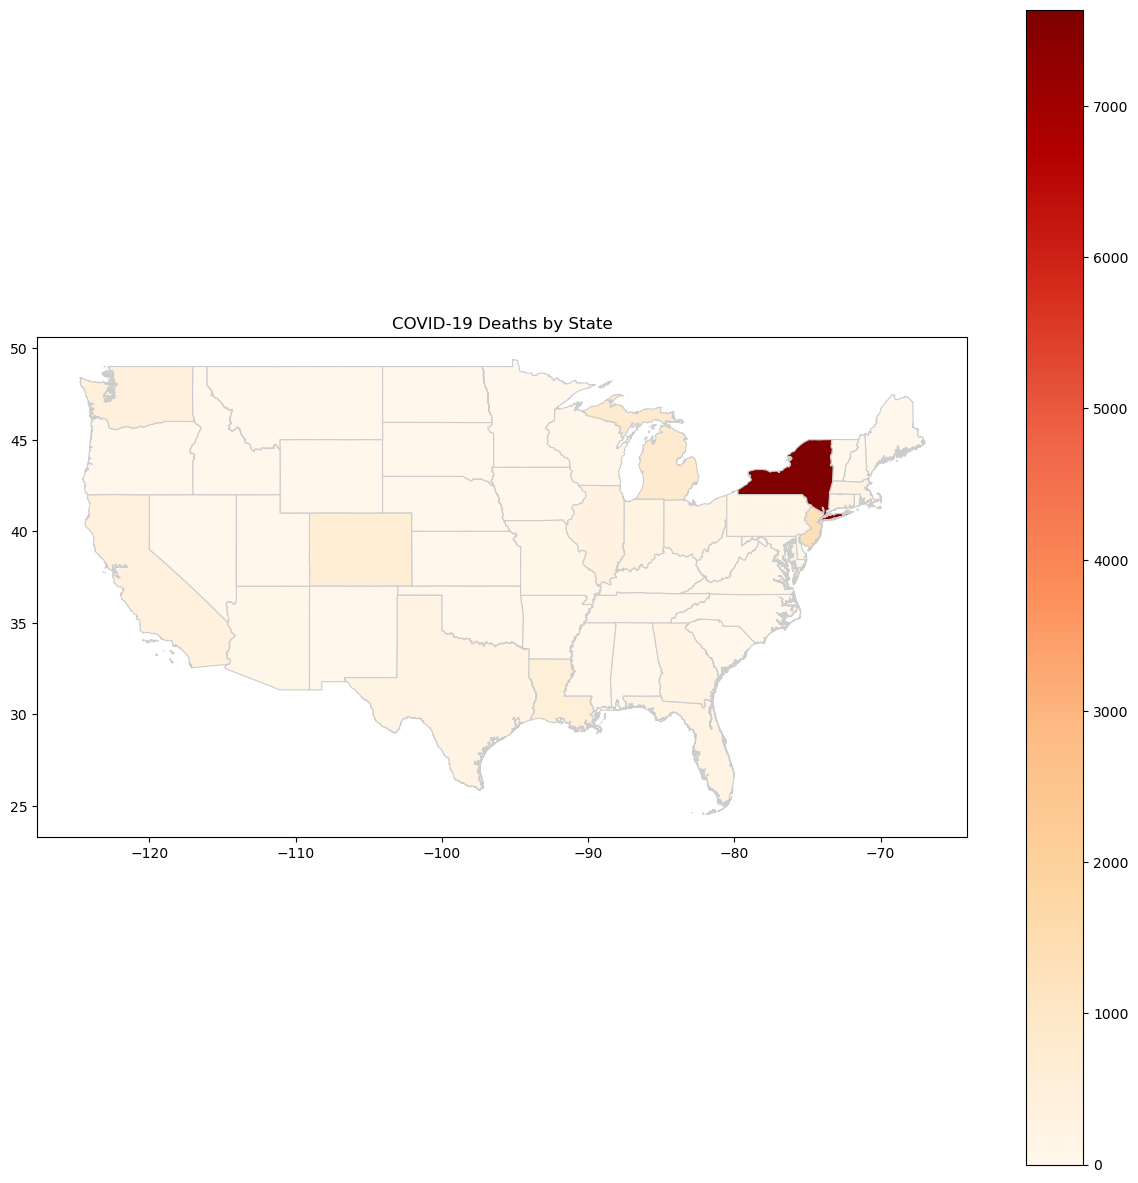

In [21]:
# Merge the data with the geopandas dataframe by the state name
us_states = us_states.rename(columns={"NAME": "Province_State"})
us_states = us_states.merge(us_covid_state, on="Province_State")

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
us_states.plot(column="4/6/20", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
plt.title("COVID-19 Deaths by State")
plt.show()

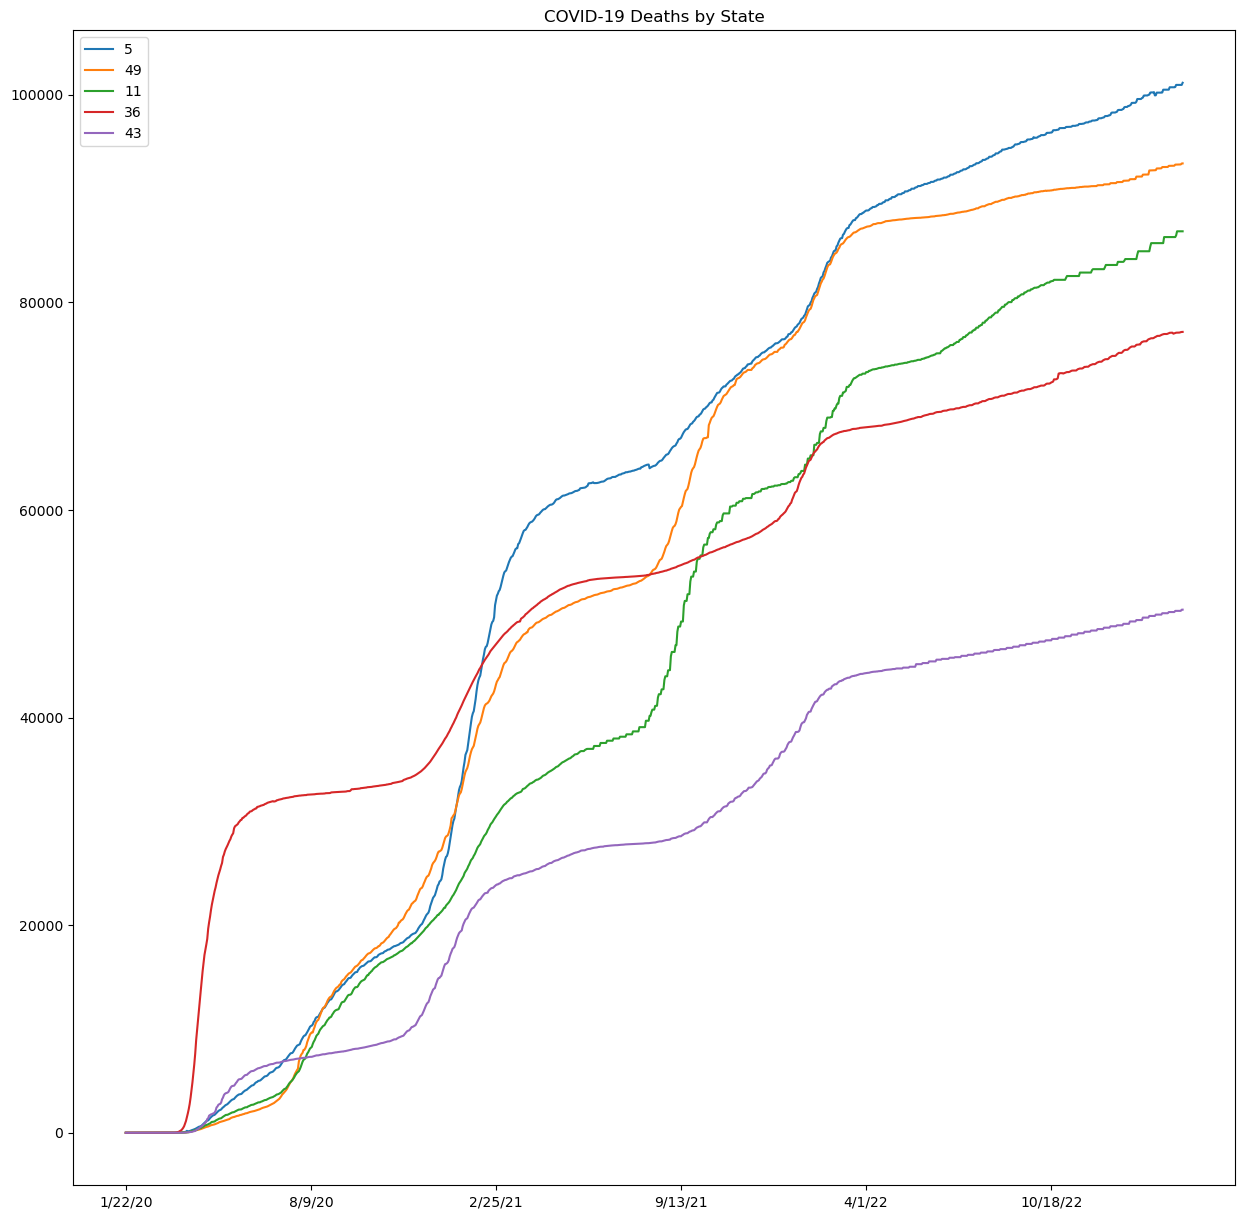

In [27]:
# Get all the column dates
dates = list(us_covid_state.columns[2:])

# Plot line graph for the top 5 states by dates
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for state in us_covid_state.nlargest(5, dates[-1])["Province_State"]:
    us_covid_state[us_covid_state["Province_State"] == state].T[2:].plot(ax=ax)
plt.title("COVID-19 Deaths by State")
plt.show()

In [43]:
quarterly = [date for date in dates if date.split("/")[1] == "1" and date.split("/")[0] in ["3", "6", "9", "12"]]
quarterly

['3/1/20',
 '6/1/20',
 '9/1/20',
 '12/1/20',
 '3/1/21',
 '6/1/21',
 '9/1/21',
 '12/1/21',
 '3/1/22',
 '6/1/22',
 '9/1/22',
 '12/1/22',
 '3/1/23']

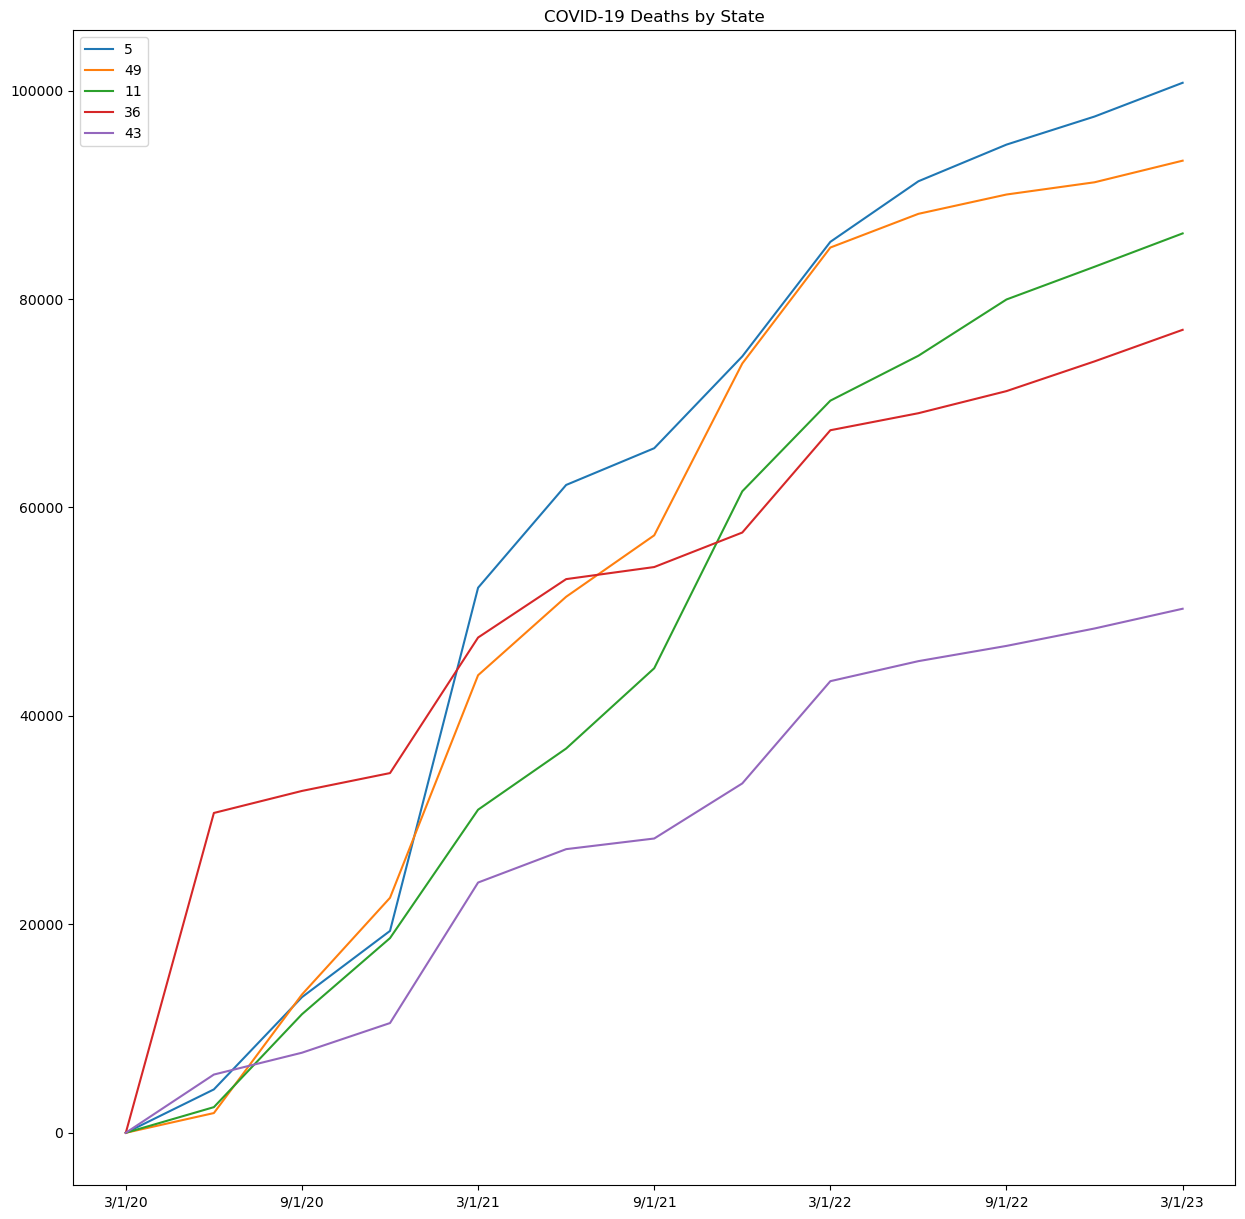

In [44]:
# Plot line graph for the top 5 states by quarterly
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for state in us_covid_state.nlargest(5, dates[-1])["Province_State"]:
    us_covid_state[us_covid_state["Province_State"] == state][quarterly].T.plot(ax=ax)
plt.title("COVID-19 Deaths by State")
plt.show()


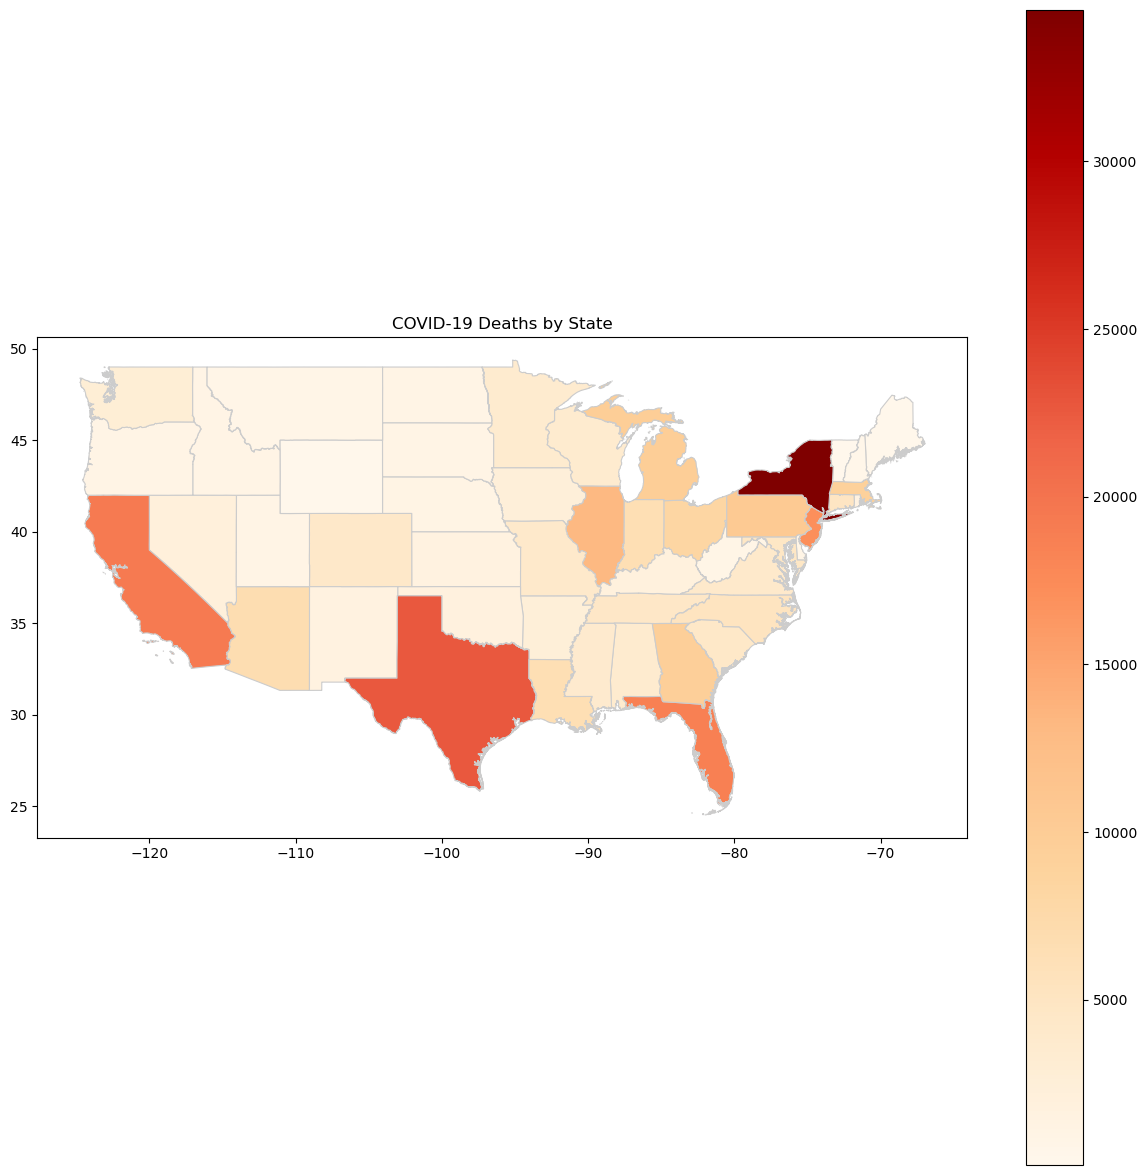

In [49]:
# Plot map time series
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
us_states.plot(column=quarterly[3], cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
plt.title("COVID-19 Deaths by State")
plt.show()

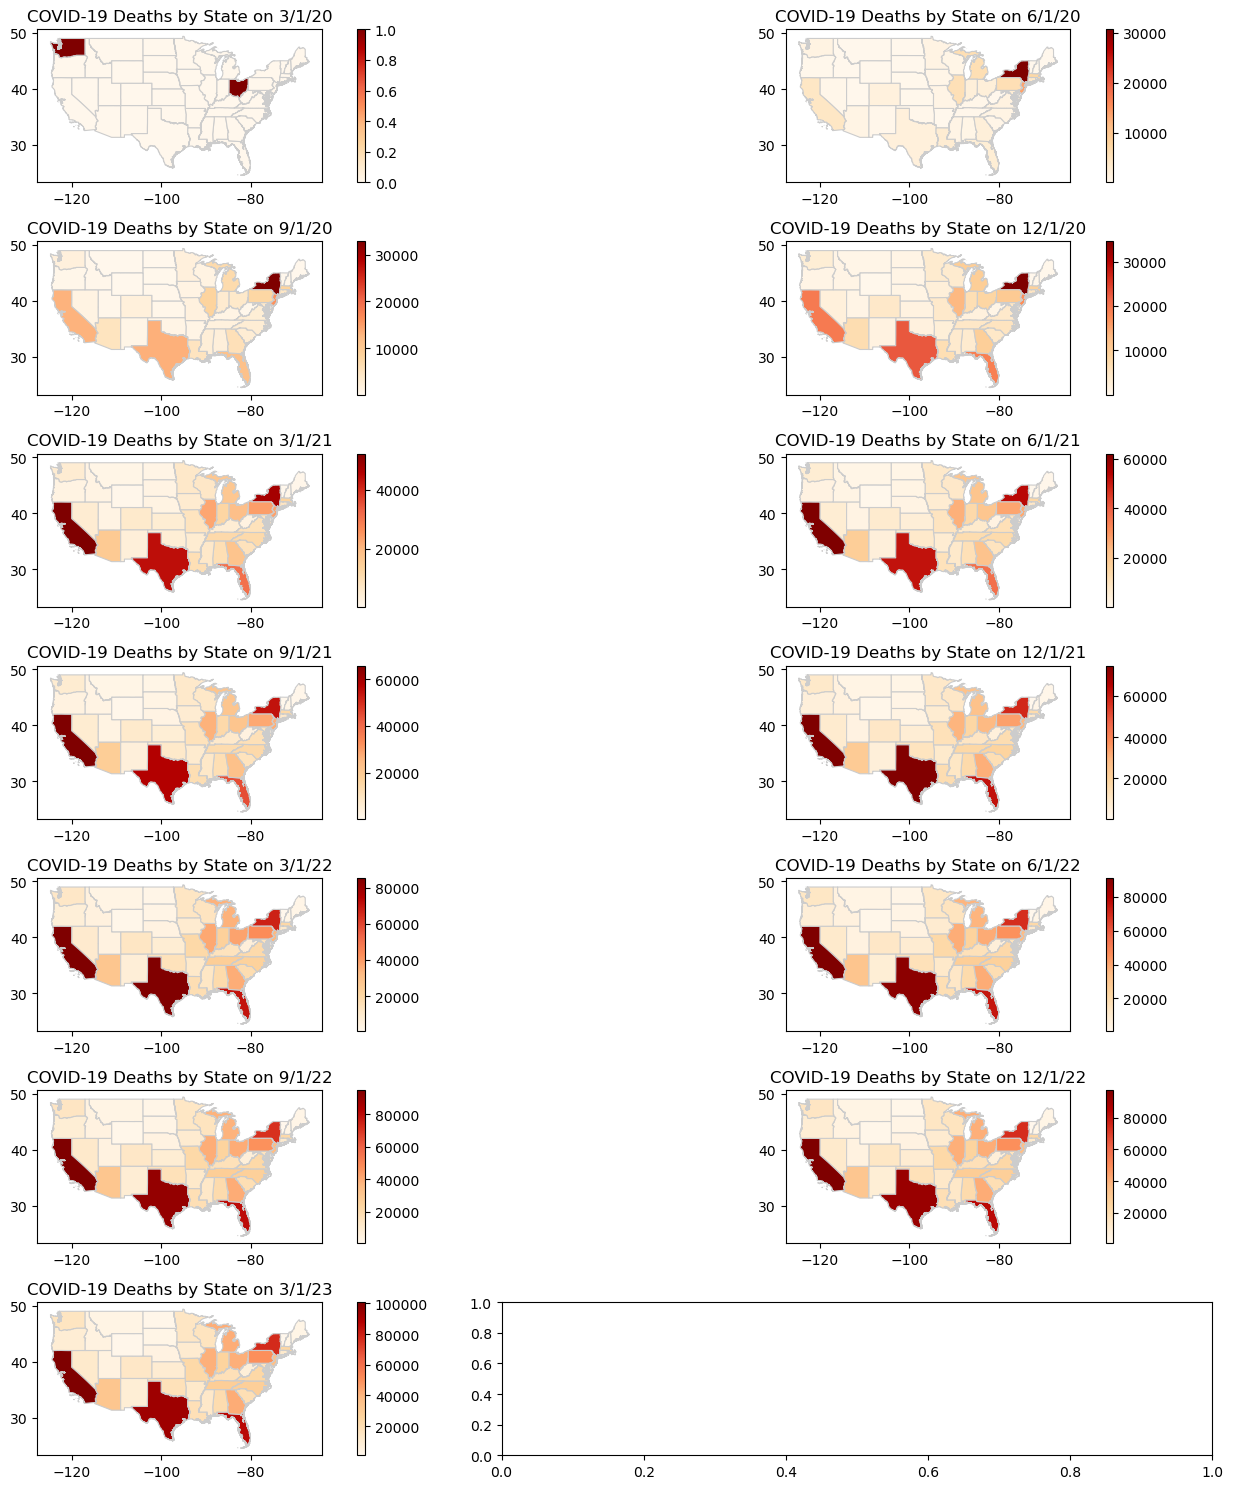

In [64]:
# Create subplots for the quarterly
fig, ax = plt.subplots(nrows=int(np.ceil(quarterly.__len__()/2)), ncols=2, squeeze=False, figsize=(15, 15))
for i, date in enumerate(quarterly):
    us_states.plot(column=date, cmap="OrRd", linewidth=0.8, ax=ax[i//2, i%2], edgecolor="0.8", legend=True)
    ax[i//2, i%2].set_title(f"COVID-19 Deaths by State on {date}")
plt.tight_layout() 
plt.show()